# point-biserial / biserial

## 点双列相関係数（point-biserial correlation）

**点双列相関係数** （point-biserial correlation） は 連続変数と自然な二値変数（連続変数を離散化したわけではない二値変数）の間の相関を測るための相関係数。


:::{admonition} 点双列相関係数（point-biserial correlation）

連続変数 $X$ 、二値変数 $Y \in\{0,1\}$ に対して：

$$
r_{\text{pbi}}=\frac{\bar{X}_1-\bar{X}_0}{s_X} \cdot \sqrt{p q}
$$


用語：

- $\bar{X}_1, \bar{X}_0: Y=1, Y=0$ のときの $X$ の平均
- $s_X: X$ の標準偏差
- $p: Y=1$ の割合
- $q=1-p$

:::




:::{card} 参考文献

- [Lev, J. (1949). The point biserial coefficient of correlation. The Annals of Mathematical Statistics, 20(1), 125-126.](https://projecteuclid.org/journals/annals-of-mathematical-statistics/volume-20/issue-1/The-Point-Biserial-Coefficient-of-Correlation/10.1214/aoms/1177730103.full)
- [Tate, R. F. (1954). Correlation between a discrete and a continuous variable. Point-biserial correlation. The Annals of mathematical statistics, 25(3), 603-607.](https://www.jstor.org/stable/2236844)
- [Kornbrot, D. (2014). Point biserial correlation. Wiley StatsRef: Statistics Reference Online.](https://onlinelibrary.wiley.com/doi/10.1002/9781118445112.stat06227)

:::

In [1]:
import numpy as np

def point_biserial_correlation(x: np.ndarray, y: np.ndarray) -> float:
    """
    Compute the point-biserial correlation between a continuous variable x
    and a binary variable y (0 or 1), assuming y is a true categorical variable.

    Parameters
    ----------
    x : np.ndarray
        Continuous variable.
    y : np.ndarray
        Binary variable (0 and 1), true categories.

    Returns
    -------
    float
        Point-biserial correlation coefficient.
    """
    x = np.asarray(x)
    y = np.asarray(y)
    
    assert set(np.unique(y)).issubset({0, 1}), "y must be binary (0/1)"
    
    x1 = x[y == 1]
    x0 = x[y == 0]
    
    M1 = np.mean(x1)
    M0 = np.mean(x0)
    s = np.std(x, ddof=0)
    
    p = np.mean(y)
    q = 1 - p

    return (M1 - M0) / s * np.sqrt(p * q)


In [2]:
np.random.seed(0)
x = np.random.normal(size=100)
x_ = x + abs(x.min())
p = (x_ - x_.min()) / x_.max()
y = np.random.binomial(n=1, p=p, size=100)

point_biserial_correlation(x, y)

np.float64(0.42540375845000344)

`scipy.stats` にも実装がある

### point-biserial と Pearsonの積率相関係数は等しい

$Y\in\{0,1\}$のときのピアソンの積率相関係数はpoint-biserialと等しい

[Proof of Point-Biserial Correlation being a special case of Pearson Correlation - Cross Validated](https://stats.stackexchange.com/questions/105542/proof-of-point-biserial-correlation-being-a-special-case-of-pearson-correlation?utm_source=chatgpt.com)

$Y$が二値変数のため、回帰直線を描くと$Y=0$の点の$X$の平均$M_0$と$Y=1$の点の$X$の平均$M_1$の2点の直線になる。

この回帰直線の傾きは$\beta = M_1 - M_0 / (1 - 0) = M_1 - M_0$


ピアソンの相関係数の定義は

$$
r=\frac{\operatorname{Cov}(X, Y)}{s_X s_Y}
$$

であり、回帰係数の定義から

$$
\beta=\frac{\operatorname{Cov}(X, Y)}{\operatorname{Var}(Y)}=\frac{s_X}{s_Y} r \implies r = \beta \cdot \frac{s_Y}{s_X}
$$

であるため

$$
r = M_1 - M_0 \cdot \frac{s_Y}{s_X}
=\frac{M_1 - M_0}{s_X} \cdot \sqrt{p(1-p)}
$$

これはpoint-biserialに等しい

In [3]:
from scipy.stats import pointbiserialr, pearsonr
pointbiserialr(x, y) == pearsonr(x, y)

True

## 双列相関係数（biserial correlation）

**バイシリアル相関係数** （biserial correlation, **双列相関係数**とも）  は、連続変数と人工的に二値化した変数（連続変数を閾値で分けたもの）の間の相関係数。

:::{admonition} 双列相関係数（biserial correlation）

連続変数 $X$ と 二値化変数 $Y \in\{0,1\}$ に対して：

$$
r_{\text{bi}}=\frac{\bar{X}_1-\bar{X}_0}{s_X} \cdot \frac{p q}{\phi(z)}
$$

各記号の意味：

- $\bar{X}_1, \bar{X}_0$ ：連続変数 $X$ の値のうち，$Y=1$ と $Y=0$ における平均
- $s_X$ ：連続変数 $X$ の全体の標準偏差
- $p, q: Y=1, Y=0$ の出現確率 $(p+q=1)$
- $z: Y=1$ に対応する潜在しきい値の標準正規分布におけるZ値（累積確率＝$p$）
- $\phi(z)$ ：標準正規分布の確率密度関数（PDF）

$$
\phi(z)=\frac{1}{\sqrt{2 \pi}} e^{-z^2 / 2}
$$
:::


仮定：

- $Y$ が自然なカテゴリ（二値）ではなく、連続変数を人工的にしきい値で切ったものという仮定が必要
- 連続変数 $X$ のほうは正規分布に近いことが望ましい


:::{card} 関連文献

- [Pearson, K. (1909). On a new method of determining correlation between a measured character A, and a character B, of which only the percentage of cases wherein B exceeds (or falls short of) a given intensity is recorded for each grade of A. Biometrika, 7(1/2), 96-105.](https://www.jstor.org/stable/2345365)
- [Jacobs, P., & Viechtbauer, W. (2017). Estimation of the biserial correlation and its sampling variance for use in meta‐analysis. Research synthesis methods, 8(2), 161-180.](https://pubmed.ncbi.nlm.nih.gov/27631635/)
:::


In [4]:
import numpy as np
from scipy.stats import norm

def biserial_correlation(x: np.ndarray, y: np.ndarray) -> float:
    """
    Compute the biserial correlation coefficient between a continuous variable x
    and a dichotomized variable y (0 or 1), assuming y was split from a latent normal variable.

    Parameters
    ----------
    x : np.ndarray
        Continuous variable.
    y : np.ndarray
        Dichotomous variable (0 and 1), assumed to be derived from a latent normal variable.

    Returns
    -------
    float
        Biserial correlation coefficient.
    """
    x = np.asarray(x)
    y = np.asarray(y)

    assert set(np.unique(y)).issubset({0, 1}), "y must be binary (0/1)"
    
    x1 = x[y == 1]
    x0 = x[y == 0]
    M1 = np.mean(x1)
    M0 = np.mean(x0)
    s = np.std(x, ddof=1)

    p = np.mean(y)
    q = 1 - p
    z = norm.ppf(p)
    phi = norm.pdf(z)

    return (M1 - M0) / s * (p * q) / phi

In [6]:
from scipy.stats import multivariate_normal

rho = 0.05
cov = np.array([[1, rho], [rho, 1]])
X = multivariate_normal.rvs(cov=cov, size=100, random_state=0)
x = X[:, 0]
y = 1 * (X[:, 1] > 0.5)
biserial_correlation(x,  y)

np.float64(0.06162599756903869)

### biserialとpoint-biserialのイメージの違い

- biserialは人工的な二値変数が対象なので1つの連続値$y_{\text{latent}}$の分布をある閾値で切断したものを扱っている
- point-biserialは自然な二値変数なので2つのクラス$\{0, 1\}$の分布はそれぞれ分かれており、重なることもありうるイメージ。
    - 例えば潜在的な能力$y_{\text{latent}}$が高い人が正答する（$y=1$になる）確率は高いが、100％ではなく偶然誤答することもありうる

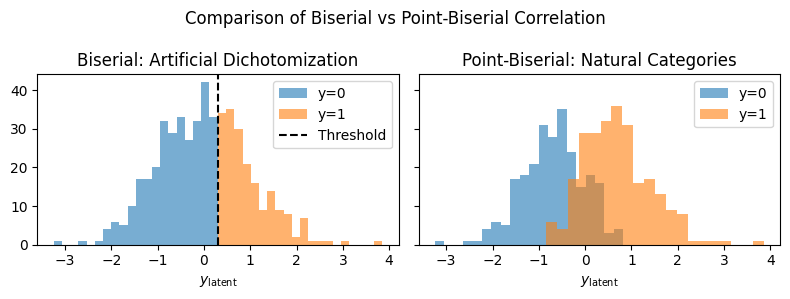

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
np.random.seed(42)
n = 500
x = np.random.normal(loc=0, scale=1, size=n)
threshold = 0.3
y_biserial = (x > threshold).astype(int)
y_point = (x + np.random.normal(0, 0.5, n) > 0).astype(int)

fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

axs[0].hist(x[y_biserial == 0], bins=20, alpha=0.6, label="y=0")
axs[0].hist(x[y_biserial == 1], bins=20, alpha=0.6, label="y=1")
axs[0].axvline(threshold, color='k', linestyle='--', label='Threshold')
axs[0].set_title("Biserial: Artificial Dichotomization")
axs[0].set_xlabel(r"$y_{\text{latent}}$")
axs[0].legend()

axs[1].hist(x[y_point == 0], bins=20, alpha=0.6, label="y=0")
axs[1].hist(x[y_point == 1], bins=20, alpha=0.6, label="y=1")
axs[1].set_title("Point-Biserial: Natural Categories")
axs[1].set_xlabel(r"$y_{\text{latent}}$")
axs[1].legend()

plt.suptitle("Comparison of Biserial vs Point-Biserial Correlation")
plt.tight_layout()
plt.show()

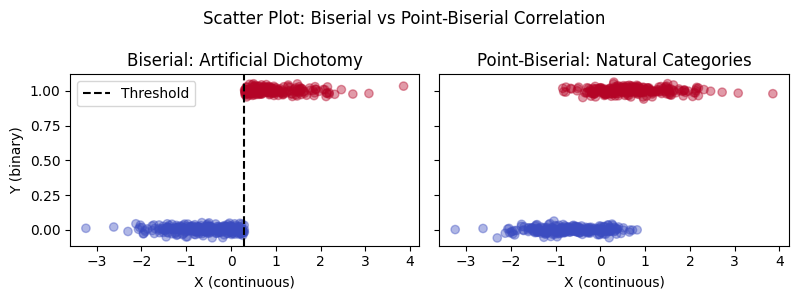

In [8]:
# Create scatter plots with color-coded categories for better intuition
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

# Biserial: artificial thresholding
axs[0].scatter(x, y_biserial + np.random.normal(0, 0.02, size=n), alpha=0.4, c=y_biserial, cmap='coolwarm')
axs[0].axvline(threshold, color='k', linestyle='--', label='Threshold')
axs[0].set_title("Biserial: Artificial Dichotomy")
axs[0].set_xlabel("X (continuous)")
axs[0].set_ylabel("Y (binary)")
axs[0].legend()

# Point-biserial: natural binary
axs[1].scatter(x, y_point + np.random.normal(0, 0.02, size=n), alpha=0.4, c=y_point, cmap='coolwarm')
axs[1].set_title("Point-Biserial: Natural Categories")
axs[1].set_xlabel("X (continuous)")

plt.suptitle("Scatter Plot: Biserial vs Point-Biserial Correlation")
plt.tight_layout()
plt.show()


#### Point-Biserialに補正係数をかけたのがBiserial

point-biserial （=Pearson's r）

$$
r_{\text{pbi}}=\frac{\bar{X}_1-\bar{X}_0}{s_X} \cdot \sqrt{p q}
$$

に対して補正係数$\frac{\sqrt{pq}}{\phi(z)}$をかけたのがBiserial

$$
r_{\text{bi}} = r_{\text{pbi}} \cdot \frac{\sqrt{pq}}{\phi(z)} = \frac{\bar{X}_1-\bar{X}_0}{s_X} \cdot \frac{p q}{\phi(z)}
$$


Peters & Van Voorhis (1940) は相関係数が$\rho$の 2 変量正規分布に従う確率変数 $X, Y$があるとき、$X$を平均値や中央値で二値化した確率変数を$X_d$とすると、$X_d$と$Y$の間の相関係数は$0.798 \rho$になる、つまり真の相関係数の約 0.8 倍へと過小評価する問題があることを報告している。

Cohen (1983)によれば、Peters and Van Voorhis (1940)が報告しているような二値化の希薄化の係数は次のように一般化できる

:::{card}

$$
e = \frac{\phi(z)}{\sqrt{p(1 - p)}}
$$

- $\phi(z)$：標準正規分布の密度関数
- $p$：二値化した変数の比率

:::

この希薄化誤差$e$の逆数をpoint-biserialに掛けているのがbiserial


In [22]:
import numpy as np
from scipy.stats import pearsonr

# 2変量標準正規分布に従うデータ
rho = 0.75
size = 10000
np.random.seed(0)
data = np.random.multivariate_normal(mean=[0, 0], cov=[[1, rho], [rho, 1]], size=size)
x, y = data[:, 0], data[:, 1]

# 平均値で二値化する
xd = 1 * (x >= np.mean(x))  # 平均で2値化
rho_d = pearsonr(xd, y)[0]
print(f"真のρ={rho:.2f}, 離散化後のpearson={rho_d:.3f}, 比率={rho_d / rho:.3f}")


from scipy.stats import norm
p = xd.mean()
mean_z = 0  # 「標準正規分布」 & 「平均値で二分」の仮定より、閾値=平均値は0
e = norm.pdf(mean_z) / np.sqrt(p * (1 - p))
print(f"{e=:.3f}, 補正後（biserial）={rho_d / e:.3f}")

真のρ=0.75, 離散化後のpearson=0.601, 比率=0.801
e=0.798, 補正後（biserial）=0.753


:::{marginal}

なお、補正係数によってはbiserialは$[-1,1]$の範囲を超えた値になる（$| r_{\text{bi}} | > 1$になる）こともある（[Jacobs & Viechtbauer, 2017](https://pubmed.ncbi.nlm.nih.gov/27631635/)）

:::

In [9]:
rho = 0.5
cov = np.array([[1, rho], [rho, 1]])
X = multivariate_normal.rvs(cov=cov, size=100, random_state=0)
x = X[:, 0]
y = 1 * (X[:, 1] > 0.5)
print(f"biserial: {biserial_correlation(x, y):.5f}")
print(f"point_biserial: {point_biserial_correlation(x, y):.5f}")

biserial: 0.42521
point_biserial: 0.32762


In [12]:
from ordinalcorr import polyserial
polyserial(x, y)

np.float64(0.4539866448381744)

### biserialとpoint-biserialはどれくらい差が出るのか

[MacCallum, R. C., Zhang, S., Preacher, K. J., & Rucker, D. D. (2002). On the practice of dichotomization of quantitative variables. Psychological methods, 7(1), 19.](https://pubmed.ncbi.nlm.nih.gov/11928888/)



### 補正係数はどういう関数になっているのか

相関の希薄化（attenuation）の効果は、二値化の分割点以上の値の比率$p = \operatorname{E}[\mathbb{1}(Y \geq \tau)]$の関数である

（閾値の標準正規分布上の位置$z$が閾値以上の値の比率$p$の関数であるため）

$$
e(p) = \frac{\phi(z)}{\sqrt{p(1 - p)}}
$$

$e(p)$は$p$が0あるいは1に近いときに極端に小さくなる。

biserial相関係数で使用する補正項は$1/e(p)$なので、補正係数が極端に大きくなることに相当する。


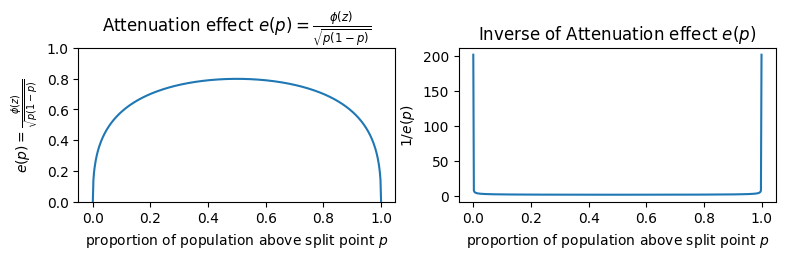

In [58]:
import numpy as np
from scipy.stats import norm
c = 0.000001
p = np.linspace(0 + c, 1 - c, 500)

def attenuation_effect(p: np.ndarray) -> np.ndarray:
    z = norm.ppf(p)
    e = norm.pdf(z) / np.sqrt(p * (1 - p))
    return e

e = attenuation_effect(p)

import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=[4, 2])
fig, axes = plt.subplots(figsize=[9, 2], ncols=2)
ax = axes[0]
ax.plot(p, e)
ax.set(
    title=r"Attenuation effect $e(p) = \frac{\phi(z)}{\sqrt{p(1-p)}}$",
    ylabel=r"$e(p) = \frac{\phi(z)}{\sqrt{p(1-p)}}$",
    xlabel=r"proportion of population above split point $p$",
    ylim=[0,1]
)

ax = axes[1]
ax.plot(p, 1/e)
ax.set(
    title=r"Inverse of Attenuation effect $e(p)$",
    ylabel=r"$1 / e(p)$",
    xlabel=r"proportion of population above split point $p$",
)

fig.show()

そのため、例えば$p$が極めて0や1に近い値のときは補正係数が大きくなりすぎてbiserial相関係数の絶対値が$1$を超えることもありうる。

In [82]:
import numpy as np
from scipy.stats import pearsonr

rho = -0.999
n = 100
np.random.seed(0)
data = np.random.multivariate_normal(mean=[0, 0], cov=[[1, rho], [rho, 1]], size=n)
x, y = data[:, 0], data[:, 1]

threshold = 0.999
yd = 1 * (y >= threshold)
p = yd.mean()
e = attenuation_effect(p)

r_pbi = pearsonr(x, yd).statistic
r_bi = r_pbi / e
print(f"{rho=:.3f}, {p=:.3f}, {r_pbi=:.3f}, {r_bi=:.3f}")

rho=-0.999, p=0.170, r_pbi=-0.714, r_bi=-1.060


## 参考文献

- [Spearman, C. (1904). The proof and measurement of association between two things. Am J Psychol, 15, 72-101.](http://digamoo.free.fr/spearman1904a.pdf)
- Cohen, J. (1983). The cost of dichotomization. _Applied psychological measurement_, 7(3), 249-253.
- Peters, C. C., & Van Voorhis, W. R. (1940). _Statistical procedures and their mathematical bases_. McGraw-Hill.
